## Loading Libraries

Let's import all the necessary packages first. You can safely ignore this section.

In [1]:
import java.util.Random;
import java.lang.*;

In [2]:
%maven org.knowm.xchart:xchart:3.5.2
import org.knowm.xchart.*;

## Helper Methods

Let's code three helper methods:

* random array generator
* array printer
* copyArray

It is assumed that you are fully capable of coding two similar methods by yourself. If you are new to Java (but have some experience with a different language), playing with these methods will help you get familiar with Java faster.

In [3]:
// random array generator
public int[] randomArr(int size) {
    Random r = new Random();
    int[] arr = new int[size];
    
    for (int i = 0; i < size; i++) {
        arr[i] = r.nextInt(1000) + 1;
    }
    
    return arr;
}

// array printer
public void printArr(int[] arr) {
    for (int num : arr) {
        System.out.print(num + " ");
    }
    System.out.println();
}

// array deep copy
public void copyArray(int[] from, int[] to) {
    if (from.length != to.length) {
        System.exit(0);
    }
    
    for (int i = 0; i < from.length; i++) {
        to[i] = from[i];
    }
}

## Insertion Sort

#### Practice - sort a linked list
Given a singly linked list with all elements as integers, sort it using insertion sort.

A linked listnode is defined for you. The solution that is covered in class can also be found below.

In [4]:
public class ListNode {
    int val;
    ListNode next;
    ListNode(int data) {
        val = data;
    }
}

**<span style="color:red">Can you provide a solution and write a few testing methods for your solution?</span>**

You want to make sure that anyone who is interested in testing your solution can utlize your testing methods to achieve effective testing easily. Such methods may include:

* *linked list printer*: print out all elements of a linked list
* *linked list generator*: generate a randomly linked list

## Quick Sort

**Does the choice of pivot value influence the time complexity of quick sort algorithm?**

Quick sort on average makes Θ(n log n) comparisons to sort n items. In the worst case scenario (*when presented with an already sorted list*), quick sort makes Θ(n^2) comparisons. Here is an implementation of quick sort with pivot value equal to the first item:

In [5]:
// quickSort
public void quickSortFirst(int[] arr, int first, int last) {
    if (first < last) {
        int partitionPoint = partition(arr, first, last);
        quickSortFirst(arr, first, partitionPoint-1);
        quickSortFirst(arr, partitionPoint+1, last);
    }
}

// partition
private int partition(int[] arr, int first, int last) {
    int pivotValue = arr[first];
    int l = first + 1, r = last;
    
    boolean done = false;
    while (!done) {
        while (l <= r && arr[l] <= pivotValue) {
            l++;
        }
        
        while (l <= r && arr[r] >= pivotValue) {
            r--;
        }
        
        if (r < l) {
            done = true;
        } else {
            int temp = arr[r];
            arr[r] = arr[l];
            arr[l] = temp;
        }
    }
    
    arr[first] = arr[r];
    arr[r] = pivotValue;
    
    return r;
}

// sanity check
int size = 10;
int[] arr = randomArr(size);
System.out.print("Given array: ");
printArr(arr);
quickSortFirst(arr, 0, arr.length-1);
System.out.print("After being sorted: ");
printArr(arr);

Given array: 854 369 857 852 883 2 789 167 778 392 
After being sorted: 2 167 369 392 778 789 852 854 857 883 


Quicksort with median-of-three partitioning functions nearly the same as normal quicksort with the only difference being how the pivot item is selected. 

The pivot item with median-of-three partitioning is selected as the median between the first element, the last element, and the middle element (decided using integer division of n/2). 

Here is its implementation:

In [6]:
// quickSort
public void quickSortMedian(int[] arr, int first, int last) {
    if (first < last) {
        int partitionPoint = partition(arr, first, last);
        quickSortMedian(arr, first, partitionPoint-1);
        quickSortMedian(arr, partitionPoint+1, last);
    }
}

// partition
public int partition(int[] arr, int first, int last) {
    // median of three - get the median to middle
    int middle = (first + last) / 2;
    if (arr[middle] < arr[first]) {
        swap(arr, first, middle);
    }
    if (arr[last] < arr[first]) {
        swap(arr, first, last);
    }
    if (arr[last] < arr[middle]) {
        swap(arr, middle, last);
    }
    // get the median to first
    swap(arr, first, middle);
    
    
    int pivotValue = arr[first];
    int l = first + 1, r = last;
    
    boolean done = false;
    while (!done) {
        while (l <= r && arr[l] <= pivotValue) {
            l++;
        }
        
        while (l <= r && arr[r] >= pivotValue) {
            r--;
        }
        
        if (r < l) {
            done = true;
        } else {
            int temp = arr[r];
            arr[r] = arr[l];
            arr[l] = temp;
        }
    }
    
    arr[first] = arr[r];
    arr[r] = pivotValue;
    
    return r;
}

// swap
public void swap(int[] arr, int a, int b) {
    int temp = arr[a];
    arr[a] = arr[b];
    arr[b] = temp;
}

// sanity check
int size = 10;
int[] arr = randomArr(size);
System.out.print("Given array: ");
printArr(arr);
quickSortMedian(arr, 0, arr.length-1);
System.out.print("After being sorted: ");
printArr(arr);

Given array: 167 111 309 488 605 947 570 273 324 118 
After being sorted: 111 118 167 273 309 324 488 570 605 947 


Now let's upgrade both methods to keep track of the running time.

In [7]:
// quickSort trck running time
public int quickSortFirstTrack(int[] arr, int first, int last) {
    int steps = 1;
    
    if (first < last) {
        int[] pair = partitionTrack(arr, first, last);
        int partitionPoint = pair[0];
        steps += pair[1];
        
        steps += quickSortFirstTrack(arr, first, partitionPoint-1);
        steps += quickSortFirstTrack(arr, partitionPoint+1, last);
    }
    
    return steps;
}

// partition
public int[] partitionTrack(int[] arr, int first, int last) {
    int steps = 3;
    
    int pivotValue = arr[first];
    int l = first + 1, r = last;   
    boolean done = false;
    
    while (!done) {
        steps++;
        
        while (l <= r && arr[l] <= pivotValue) {
            l++;
            steps++;
        }
        
        while (l <= r && arr[r] >= pivotValue) {
            r--;
            steps++;
        }
        
        if (r < l) {
            done = true;
            steps++;
        } else {
            int temp = arr[r];
            arr[r] = arr[l];
            arr[l] = temp;
            steps += 3;
        }
    }
    
    steps += 2;
    arr[first] = arr[r];
    arr[r] = pivotValue;
    
    int[] results = new int[2];
    results[0] = r;
    results[1] = steps;
    
    return results;
}

// sanity check
int size = 10;
int[] arr = randomArr(size);
System.out.print("Given array: ");
printArr(arr);
int steps = quickSortFirstTrack(arr, 0, arr.length-1);
System.out.print("After being sorted: ");
printArr(arr);
System.out.println("Steps: " + steps);

Given array: 518 518 233 601 779 251 646 646 914 717 
After being sorted: 233 251 518 518 601 646 646 717 779 914 
Steps: 89


In [8]:
// quickSort Median of Three trck running time
public int quickSortMedianTrack(int[] arr, int first, int last) {
    int steps = 1;
    
    if (first < last) {
        int[] pair = partitionTrack2(arr, first, last);
        int partitionPoint = pair[0];
        steps += pair[1];
        
        steps += quickSortMedianTrack(arr, first, partitionPoint-1);
        steps += quickSortMedianTrack(arr, partitionPoint+1, last);
    }
    
    return steps;
}

// partition
public int[] partitionTrack2(int[] arr, int first, int last) {
    int steps = 8;
    
    // median of three - get the median to middle
    int middle = (first + last) / 2;
    if (arr[middle] < arr[first]) {
        steps += swapTrack(arr, first, middle);
    }
    if (arr[last] < arr[first]) {
        steps += swapTrack(arr, first, last);
    }
    if (arr[last] < arr[middle]) {
        steps += swapTrack(arr, middle, last);
    }
    // get the median to first
    steps += swapTrack(arr, first, middle);
    
    int pivotValue = arr[first];
    int l = first + 1, r = last;   
    boolean done = false;
    
    while (!done) {
        steps++;
        
        while (l <= r && arr[l] <= pivotValue) {
            l++;
            steps++;
        }
        
        while (l <= r && arr[r] >= pivotValue) {
            r--;
            steps++;
        }
        
        if (r < l) {
            done = true;
            steps++;
        } else {
            int temp = arr[r];
            arr[r] = arr[l];
            arr[l] = temp;
            steps += 3;
        }
    }
    
    steps += 2;
    arr[first] = arr[r];
    arr[r] = pivotValue;
    
    int[] results = new int[2];
    results[0] = r;
    results[1] = steps;
    
    return results;
}

// swap
public int swapTrack(int[] arr, int a, int b) {
    int steps = 3;

    int temp = arr[a];
    arr[a] = arr[b];
    arr[b] = temp;
    
    return steps;
}

// sanity check
int size = 10;
int[] arr = randomArr(size);
System.out.print("Given array: ");
printArr(arr);
int steps = quickSortFirstTrack(arr, 0, arr.length-1);
System.out.print("After being sorted: ");
printArr(arr);
System.out.println("Steps: " + steps);

Given array: 31 133 80 1 626 53 355 93 374 745 
After being sorted: 1 31 53 80 93 133 355 374 626 745 
Steps: 90


Now let's plot the comparison between the two on the worst case scenarios of arrays with different lengths. By looking at the comparison, it is easy to conclude that quick sort with median of three strategy is more effective. As the size of input grows, the efficiency difference grows.

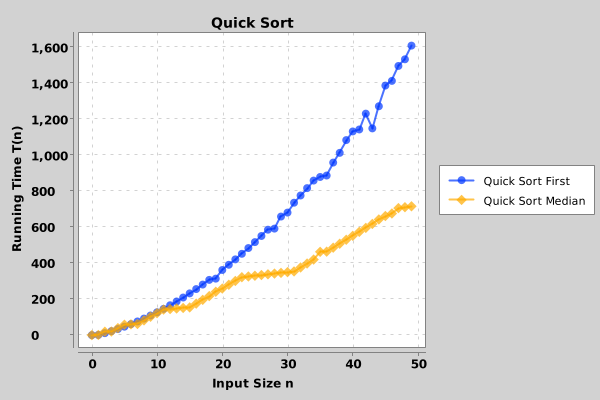

In [9]:
// predetermined size
size = 50;

// storage of steps
int[] quickSortFirstArr = new int[size];
int[] quickSortMedianArr = new int[size];

// populate storage
for (int i = 1; i < size; i++) {
    // prepare two exactly same sorted arrays
    int[] temp1 = randomArr(i);
    Arrays.sort(temp1);
    int[] temp2 = new int[temp1.length];
    copyArray(temp1, temp2);
    
    quickSortFirstArr[i] = quickSortFirstTrack(temp1, 0, i-1);
    quickSortMedianArr[i] = quickSortMedianTrack(temp2, 0, i-1);
}

// size of input - convert int to double for plotting
double[] xData = new double[size];
for (int i = 1; i < xData.length; i++) {
    xData[i] = i;
}

// Quick Sort First
double[] yDataB = new double[size];
for (int i = 0; i < yDataB.length; i++) {
    yDataB[i] = quickSortFirstArr[i];
}

// Quick Sort Median
double[] yDataN = new double[size];
for (int i = 0; i < yDataN.length; i++) {
    yDataN[i] = quickSortMedianArr[i];
}

// plot it
XYChart chart = new XYChartBuilder().width(600).height(400).title("Quick Sort").xAxisTitle("Input Size n").yAxisTitle("Running Time T(n)").build();
chart.addSeries("Quick Sort First", xData, yDataB);
chart.addSeries("Quick Sort Median", xData, yDataN);
BitmapEncoder.getBufferedImage(chart);

## Merge Sort

#### Practice - sort by color

Given an array with n objects colored red, white or blue, sort them in-place so that objects of the same color are adjacent, with the colors in the order red, white and blue. We will use the integers 0, 1, and 2 to represent the color red, white, and blue respectively.

Example:

```
Input: [2,0,2,1,1,0]
Output: [0,0,1,1,2,2]
```

In [10]:
public void mergeSort(int[] arr, int n) {
    if (n < 2) {
        return;
    }
    int mid = n / 2;
    int[] l = new int[mid];
    int[] r = new int[n - mid];
 
    for (int i = 0; i < mid; i++) {
        l[i] = arr[i];
    }
    for (int i = mid; i < n; i++) {
        r[i - mid] = arr[i];
    }
    mergeSort(l, mid);
    mergeSort(r, n - mid);
 
    merge(arr, l, r, mid, n - mid);
}

public void merge(int[] arr, int[] l, int[] r, int left, int right) {
  
    int i = 0, j = 0, k = 0;
    while (i < left && j < right) {
        if (l[i] <= r[j]) {
            arr[k++] = l[i++];
        }
        else {
            arr[k++] = r[j++];
        }
    }
    while (i < left) {
        arr[k++] = l[i++];
    }
    while (j < right) {
        arr[k++] = r[j++];
    }
}

**<span style="color:red">Can you write a few methods to make the testing of the above solution scalable?</span>**

Such methods may include:

* *array generator*: generate a random array

You can reuse my code that generates a random array.

#### Practice - merge two sorted linked lists

Merge two sorted linked lists and return it as a new list. The new list should be made by splicing together the nodes of the first two lists.

Example:
```
Input: 1->2->4, 1->3->4
Output: 1->1->2->3->4->4
```

A linked listnode is defined for you as the following.

In [11]:
public class ListNode {
    int val;
    ListNode next;
    ListNode(int data) {
        val = data;
    }
}

In [6]:
public ListNode insertLSort(ListNode head) {
    // your code goes here
    // remove this line
    ListNod
}

CompilationException: 

**<span style="color:red">Can you provide a solution and write a few testing methods for your solution?</span>**

You want to make sure that anyone who is interested in testing your solution can utlize your testing methods to achieve effective testing easily. Such methods may include:

* *linked list printer*: print out all elements of a linked list
* *linked list generator*: generate a randomly linked list

You can reuse your testing code for testing the solution of insertion sort (linked list).

#### Practice - merge k sorted linked lists

Merge k sorted linked lists and return it as one sorted list.

Example:

```
Input:
  1->4->5,
  1->3->4,
  2->6
Output: 1->1->2->3->4->4->5->6
```

A linked listnode is defined for you as the following.

In [12]:
public class ListNode {
    int val;
    ListNode next;
    ListNode(int data) {
        val = data;
    }
}

**<span style="color:red">Can you provide a solution and write a few testing methods for your solution?</span>**

You want to make sure that anyone who is interested in testing your solution can utlize your testing methods to achieve effective testing easily. Such methods may include:

* *linked list printer*: print out all elements of a linked list
* *linked list generator*: generate a randomly linked list

You can reuse your testing code for testing the solution of insertion sort (linked list).

## Do It Yourself

Given an array A of non-negative integers, half of the integers in A are odd, and half of the integers are even. Sort the array so that whenever A[i] is odd, i is odd; and whenever A[i] is even, i is even. You may return any answer array that satisfies this condition. 

Example:
```
Input: [4,2,5,7]
Output: [4,5,2,7]
Explanation: [4,7,2,5], [2,5,4,7], [2,7,4,5] would also have been accepted.
```

Please also indicate the best, average and worst time complexity of your own solution. You may want to lay out some basic reasoning for your answers (*maybe with a plot*).

**When you finish (or not) playing your exploration of the whole interactive notebook and DIY assignment, you should download a html file and upload it to the assignment box on Canvas:**

* File --> Download as --> HTML (.html)

![download](images/html.png)